# **Chicago Crime Time Series**

_John Andrew Dixon_

---

##### **Imports**

In [152]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd
import seaborn as sns

##### **Data Load**

In [131]:
# Get the list of crime files from "./Data/Chicago/"
crime_files = sorted(glob.glob("./Data/Chicago/*.csv"))
# Create one DataFrame from all the files
original_df = pd.concat([pd.read_csv(crime_file) for crime_file in crime_files])
# Add a full crime description
original_df["Full Crime"] = original_df["Primary Type"] + " " + original_df["Description"]
# Verify it worked
original_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
0,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608,CRIMINAL DAMAGE TO PROPERTY
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087,CRIMINAL DAMAGE TO VEHICLE
2,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,THEFT $500 AND UNDER
3,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896,THEFT FINANCIAL ID THEFT: OVER $300
4,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,CRIM SEXUAL ASSAULT PREDATORY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100405,13091787,05/30/2023 12:48:00 PM,THEFT,RETAIL THEFT,DRUG STORE,False,False,1733,17.0,33.0,41.953925,-87.707307,THEFT RETAIL THEFT
100406,13090302,05/30/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE,False,False,522,5.0,9.0,41.677237,-87.623871,CRIMINAL DAMAGE TO VEHICLE
100407,13089754,05/30/2023 12:52:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CONVENIENCE STORE,False,False,2511,25.0,36.0,41.938194,-87.793558,CRIMINAL DAMAGE TO PROPERTY
100408,13090346,05/30/2023 12:55:00 PM,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1913,19.0,46.0,41.963071,-87.655984,THEFT RETAIL THEFT


In [132]:
# Specify the datetime format
date_format = "%m/%d/%Y %I:%M:%S %p"
# Creat the Datetime column and make the date column into a datetime column
original_df["Datetime"] = pd.to_datetime(original_df["Date"], format=date_format)
# Change the index of the DataFrame to the Date
original_df = original_df.set_index("Datetime")

---

## **Stakeholder Questions**

### **Comparing Police Districts:**

#### _Which district has the most crimes? Which has the least?_

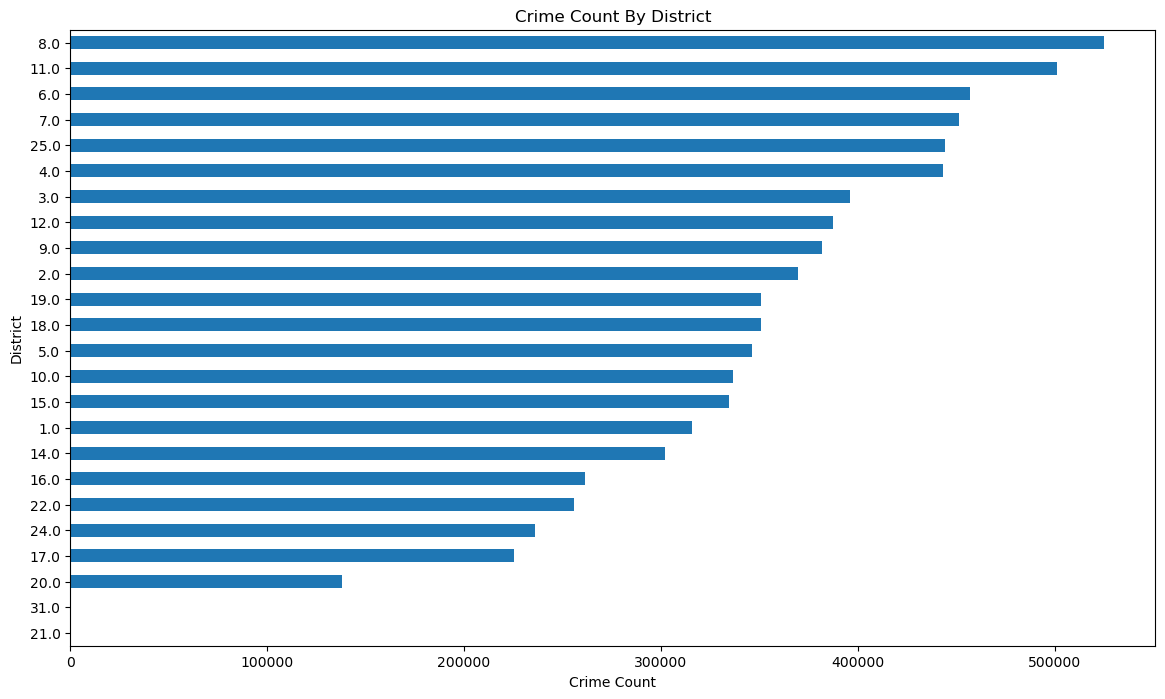

In [133]:
ax = original_df["District"].value_counts().sort_values().plot(kind="barh", figsize=(14, 8))
ax.set_title("Crime Count By District")
ax.set_xlabel("Crime Count")
ax.set_ylabel("District");

District 8 has, undoubtedly, the most amount of crime. But, it's harder to find the district with the least amount of crime since. Because district 21, according to our data, has the least amount of crime but according to the websites below, there is no district 21 (since it is not listed anywhere):
- https://gis.chicagopolice.org/pages/cpd-pdf-maps
- https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r
- https://www.chicago.gov/city/en/depts/cpd.html

Going further, by analyzing the crimes located in district 21 from the data we can see something odd about these crimes:

In [134]:
original_df.loc[original_df["District"] == 21, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2003-07-20 00:05:00,2841856,07/20/2003 12:05:00 AM,THEFT,FROM BUILDING,OTHER,False,False,2112,21.0,3.0,41.837901,-87.621915,THEFT FROM BUILDING
2004-02-18 18:15:00,3184687,02/18/2004 06:15:00 PM,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2112,21.0,3.0,41.837901,-87.621915,BATTERY AGGRAVATED:KNIFE/CUTTING INSTR
2004-07-04 15:45:48,3425216,07/04/2004 03:45:48 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2112,21.0,3.0,41.837901,-87.621915,NARCOTICS POSS: HEROIN(WHITE)
2004-08-01 20:05:00,3465922,08/01/2004 08:05:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,True,2112,21.0,3.0,41.837901,-87.621915,BATTERY DOMESTIC BATTERY SIMPLE


There are only 4 total crimes in this supposed district and all happen within 13 months of each other. None happen before 07/2003 or after 08/2004. There are no updates at all. So, I will say that district 21 can be ignored since it is possibly erroneous. 

District 31 is the next district that has the least amount of crimes. We'll check it for oddities too since it seems to have a small amount of crime compared to the other districts in the plot above. Notably, we'll be searching for recent crimes to prove to us that this district actually exists:

In [135]:
original_df.loc[original_df["District"] == 31, :]

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime
Datetime,,,,,,,,,,,,,
2002-01-25 17:17:00,1999690,01/25/2002 05:17:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1621,31.0,NaN,42.007037,-87.761712,OTHER OFFENSE HARASSMENT BY TELEPHONE
2002-03-02 01:00:00,2013371,03/02/2002 01:00:00 AM,THEFT,OVER $500,BAR OR TAVERN,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT OVER $500
2002-03-06 19:30:00,2019929,03/06/2002 07:30:00 PM,BURGLARY,FORCIBLE ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,1651,31.0,NaN,41.973534,-87.866809,BURGLARY FORCIBLE ENTRY
2002-04-04 13:00:00,2064064,04/04/2002 01:00:00 PM,THEFT,$500 AND UNDER,SIDEWALK,False,False,533,31.0,NaN,41.646187,-87.617227,THEFT $500 AND UNDER
2002-04-05 09:00:00,2066054,04/05/2002 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1611,31.0,NaN,42.000241,-87.799527,THEFT $500 AND UNDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-11 17:00:00,12956274,01/11/2023 05:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1654,31.0,41.0,42.003002,-87.894202,MOTOR VEHICLE THEFT AUTOMOBILE
2023-01-11 10:50:00,12950142,01/11/2023 10:50:00 AM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906491,ASSAULT SIMPLE
2023-02-07 17:30:00,13077041,02/07/2023 05:30:00 PM,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,42.008962,-87.906473,BATTERY SIMPLE


The crimes that happened within this district range from 2002 to 2023. Based on this, I conclude that this district is real and thus has the least amount of crime.

**Result**:
- District 8: Has the most crime.
- District 31: Has the least crime.

> _**Note:** Based upon comparing maps, I believe the crimes in district 21 happened in district 2 based on the latitude and longitude given. But, this is just conjecture._

### **Comparing AM vs. PM Rush Hour:**

#### _Are crimes more common during AM rush hour or PM rush hour?_

In [136]:
# Filter crimes based on time. The following helped me do this:
# https://pub.towardsai.net/how-to-filter-pandas-dataframe-by-time-81509d3adee9
# The other way to do this would be to use the following as filters:
# AM -> ((original_df.index.hour >= 7) & (original_df.index.hour <= 9)) | ((original_df.index.hour == 10) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# PM -> ((original_df.index.hour >= 16) & (original_df.index.hour <= 18)) | ((original_df.index.hour == 19) & (original_df.index.minute == 0) & (original_df.index.second == 0))
# It gives the same result but is way, way uglier so I searched the web and found the above article
am_rush_df = original_df.copy().between_time("07:00", "10:00")
pm_rush_df = original_df.copy().between_time("16:00", "19:00")
am_rush_df.loc[:, "Rush Hour"] = "AM"
pm_rush_df.loc[:, "Rush Hour"] = "PM"
display(am_rush_df.info())
pm_rush_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 897887 entries, 2001-01-01 07:00:00 to 2023-05-30 10:00:00
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    897887 non-null  int64  
 1   Date                  897887 non-null  object 
 2   Primary Type          897887 non-null  object 
 3   Description           897887 non-null  object 
 4   Location Description  896117 non-null  object 
 5   Arrest                897887 non-null  bool   
 6   Domestic              897887 non-null  bool   
 7   Beat                  897887 non-null  int64  
 8   District              897885 non-null  float64
 9   Ward                  833013 non-null  float64
 10  Latitude              882738 non-null  float64
 11  Longitude             882738 non-null  float64
 12  Full Crime            897887 non-null  object 
 13  Rush Hour             897887 non-null  object 
dtypes: bool(2), float6

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1355665 entries, 2001-01-01 16:00:00 to 2023-05-30 19:00:00
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1355665 non-null  int64  
 1   Date                  1355665 non-null  object 
 2   Primary Type          1355665 non-null  object 
 3   Description           1355665 non-null  object 
 4   Location Description  1353996 non-null  object 
 5   Arrest                1355665 non-null  bool   
 6   Domestic              1355665 non-null  bool   
 7   Beat                  1355665 non-null  int64  
 8   District              1355657 non-null  float64
 9   Ward                  1245339 non-null  float64
 10  Latitude              1344842 non-null  float64
 11  Longitude             1344842 non-null  float64
 12  Full Crime            1355665 non-null  object 
 13  Rush Hour             1355665 non-null  object 
dtypes

In [137]:
# Combine the AM/PM rush hour DataFrames into one
am_pm_rush_df = pd.concat([am_rush_df, pm_rush_df])
am_pm_rush_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Full Crime,Rush Hour
Datetime,,,,,,,,,,,,,,
2001-01-01 07:00:00,1319849,01/01/2001 07:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,925,9.0,NaN,NaN,NaN,THEFT $500 AND UNDER,AM
2001-01-01 07:00:00,1890605,01/01/2001 07:00:00 AM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,SMALL RETAIL STORE,False,False,2411,24.0,NaN,42.006281,-87.689954,OTHER OFFENSE HARASSMENT BY ELECTRONIC MEANS,AM
2001-01-01 07:00:00,1461383,01/01/2001 07:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2535,25.0,NaN,41.904144,-87.724985,THEFT $500 AND UNDER,AM
2001-01-01 07:00:00,1312745,01/01/2001 07:00:00 AM,BURGLARY,UNLAWFUL ENTRY,CHA APARTMENT,False,False,1333,12.0,NaN,41.883291,-87.674366,BURGLARY UNLAWFUL ENTRY,AM
2001-01-01 07:00:00,1352406,01/01/2001 07:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1623,16.0,NaN,41.968067,-87.753471,OTHER OFFENSE HARASSMENT BY TELEPHONE,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 19:00:00,13092447,05/30/2023 07:00:00 PM,THEFT,OVER $500,STREET,False,False,1612,16.0,41.0,41.983082,-87.802124,THEFT OVER $500,PM
2023-05-30 19:00:00,13091343,05/30/2023 07:00:00 PM,THEFT,OVER $500,APARTMENT,False,False,211,2.0,4.0,41.838385,-87.620314,THEFT OVER $500,PM
2023-05-30 19:00:00,13091068,05/30/2023 07:00:00 PM,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,124,1.0,28.0,41.868573,-87.640762,MOTOR VEHICLE THEFT ATTEMPT - AUTOMOBILE,PM


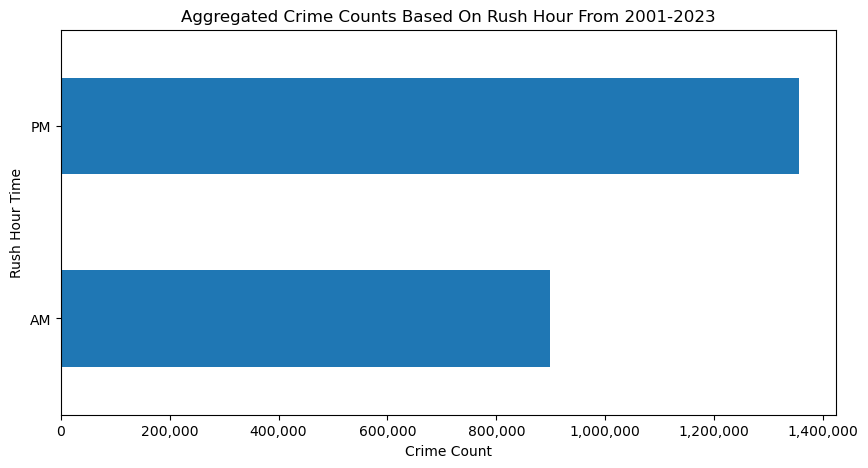

In [144]:
# Create the plot
ax = am_pm_rush_df["Rush Hour"].value_counts().sort_index().plot(kind="barh", figsize=(10, 5))

# Format the title and labels
ax.set_title("Aggregated Crime Counts Based On Rush Hour From 2001-2023")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Rush Hour Time")

# Format the x-tick labels
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")
ax.xaxis.set_major_formatter(crime_cnt_format);

**Result:**
- Crimes are more common during the PM rush hour.

#### _What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?_

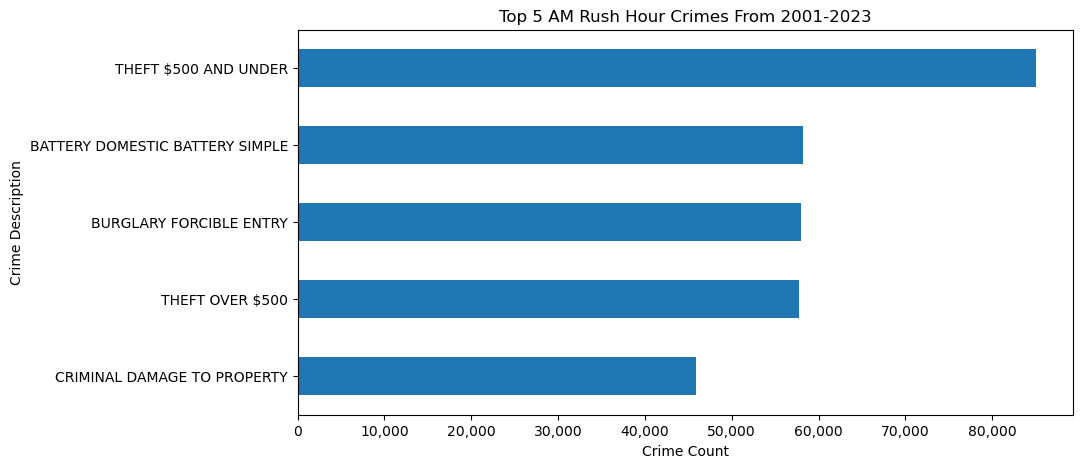

In [151]:
# Create the plot
ax = am_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail().plot(kind="barh", figsize=(10, 5))

# Format the title and labels
ax.set_title("Top 5 AM Rush Hour Crimes From 2001-2023")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Description")

# Format the x-tick labels
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")
ax.xaxis.set_major_formatter(crime_cnt_format);

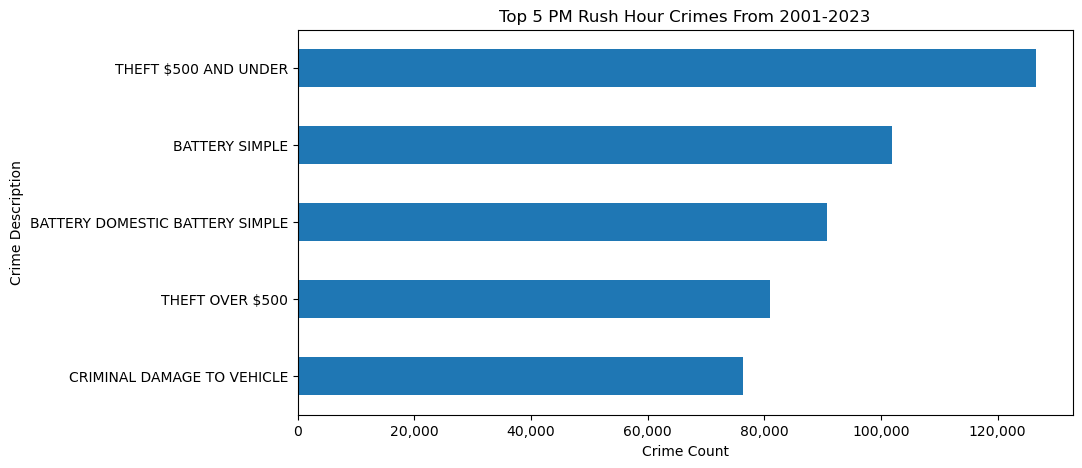

In [150]:
# Create the plot
ax = pm_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail().plot(kind="barh", figsize=(10, 5))

# Format the title and labels
ax.set_title("Top 5 PM Rush Hour Crimes From 2001-2023")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Description")

# Format the x-tick labels
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")
ax.xaxis.set_major_formatter(crime_cnt_format);

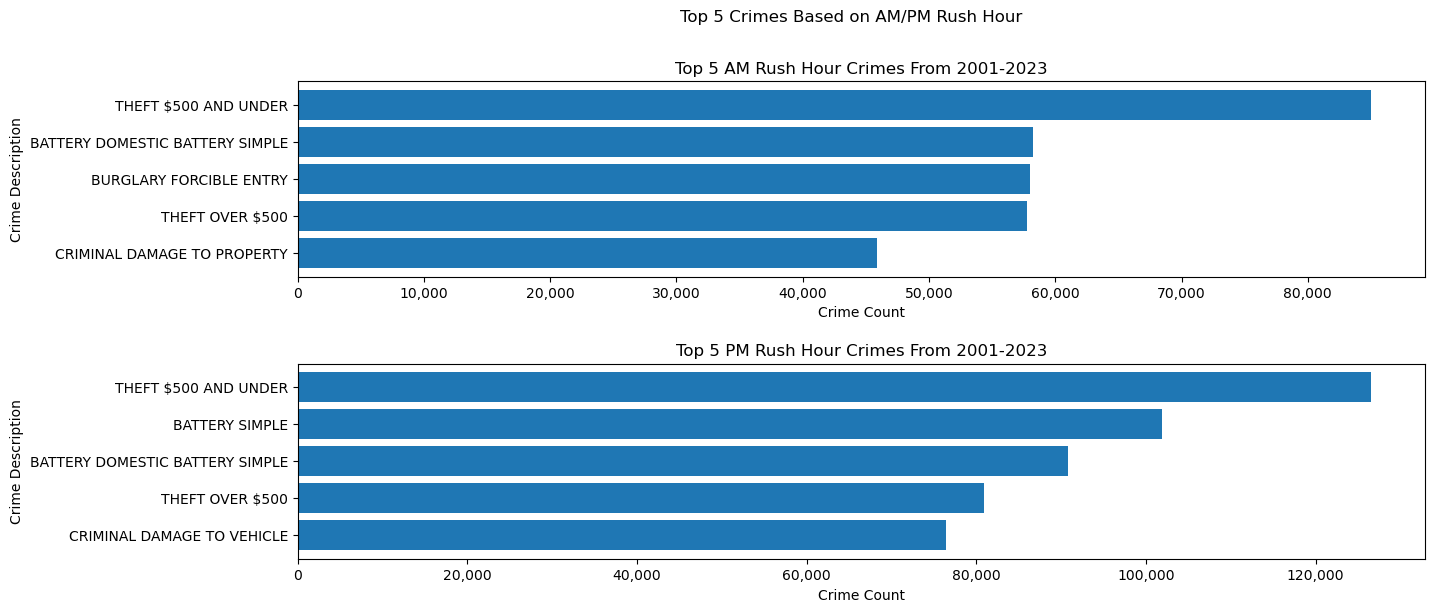

In [187]:
am = am_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
pm = pm_rush_df["Full Crime"].value_counts().sort_values(ascending=True).tail()
crime_cnt_format = mticks.StrMethodFormatter("{x:,.0f}")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

fig.tight_layout(h_pad=5)
plt.subplots_adjust(top=0.86)


ax[0].barh(am.index, am.values)
ax[0].set_title("Top 5 AM Rush Hour Crimes From 2001-2023")
ax[0].set_xlabel("Crime Count")
ax[0].set_ylabel("Crime Description")
ax[0].xaxis.set_major_formatter(crime_cnt_format)

ax[1].barh(pm.index, pm.values)
ax[1].set_title("Top 5 PM Rush Hour Crimes From 2001-2023")
ax[1].set_xlabel("Crime Count")
ax[1].set_ylabel("Crime Description")
ax[1].xaxis.set_major_formatter(crime_cnt_format)

**Result:**
- See above. It is worth noting that the crimes in the AM rush hour are near the same as those in the PM rush hour. The differences are as such:
    - AM rush hour has `Burglary Forcible Entry` whereas PM rush hour has `Battery Simple`.
    - AM rush hour has `Criminal Damage To Property` whereas PM rush hour has `Criminal Damage To Vehicle`.
    - There are differences in rank of crimes which can be readily seen above.

#### _Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?_